## Customer Segmentation with K-means

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Run k-means

In [18]:
datamart_rfm = pd.read_csv('datamart_rfm.csv')

In [21]:
datamart_rfm.head()

,Recency,Frequency,MonetaryValue
0,3,25,948.70
1,1,888,7046.16
2,4,37,813.45
3,4,17,268.02
4,71,9,146.15


In [19]:
datamart_log = np.log(datamart_rfm)


scaler = StandardScaler()
scaler.fit(datamart_log)


datamart_normalized = scaler.transform(datamart_log)

In [4]:

from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=1) 


kmeans.fit(datamart_normalized)


cluster_labels = kmeans.labels_

### Assign labels to raw data

In [5]:

datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels)


grouped = datamart_rfm_k3.groupby(['Cluster'])


grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          16.1      50.1        1050.6   901
1         166.6       3.0          53.0  1156
2          77.1      12.3         216.0  1586

### Calculate sum of squared errors

In [6]:
sse = {}

In [7]:

for k in range(1, 15):
  
    
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    
    kmeans.fit(datamart_normalized)
    
    
    sse[k] = kmeans.inertia_ 

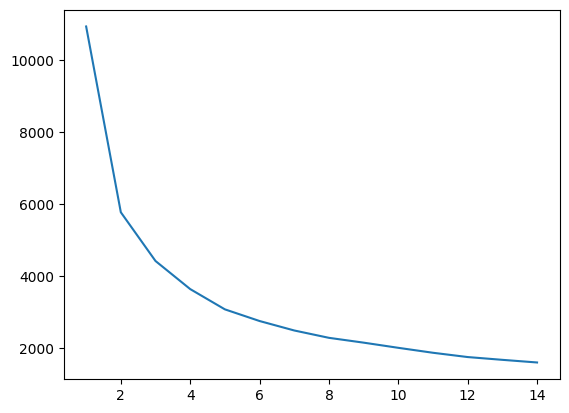

In [8]:
plt.plot(sse.keys(), sse.values());

### Plot sum of squared errors

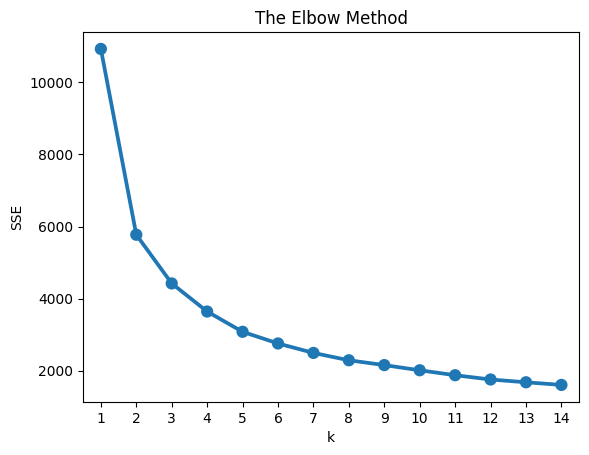

In [9]:

plt.title('The Elbow Method')


plt.xlabel('k')


plt.ylabel('SSE')


sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

### Prepare data for the snake plot

In [22]:

datamart_melt = pd.melt(
    datamart_rfm_k3.reset_index(), 

                    id_vars=['Cluster'],

                    value_vars=['Recency', 'Frequency', 'MonetaryValue'],                         

                    var_name='Metric', value_name='Value'
)

In [24]:
datamart_melt.sample(10)

,Cluster,Metric,Value
4253,2,Frequency,8.00
5884,2,Frequency,8.00
6321,1,Frequency,5.00
4543,2,Frequency,8.00
6940,0,Frequency,41.00
8740,1,MonetaryValue,37.05
6943,0,Frequency,43.00
9407,1,MonetaryValue,23.10
1314,2,Recency,9.00
3124,1,Recency,66.00
